### Support Vector Machines
In the first part of this exercise, you will  build  support vector machines
(SVMs) for solving  binary classification problems. You will experiment with your
classifier on three example 2D datasets. Experimenting with these datasets
will help you gain  intuition into how SVMs work and how to use a Gaussian
kernel with SVMs. 

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython

%load_ext autoreload
%autoreload 2

### Data set 1
We will begin  with a 2D example dataset which can be separated by a
linear boundary.  In
this dataset, the positions of the positive examples (green circles) and the
negative examples (indicated with red circles) suggest a natural separation indicated
by the gap. However, notice that there is an outlier positive example  on
the far left at about (0.1, 4.1). As part of this exercise, you will also see how
this outlier affects the SVM decision boundary.

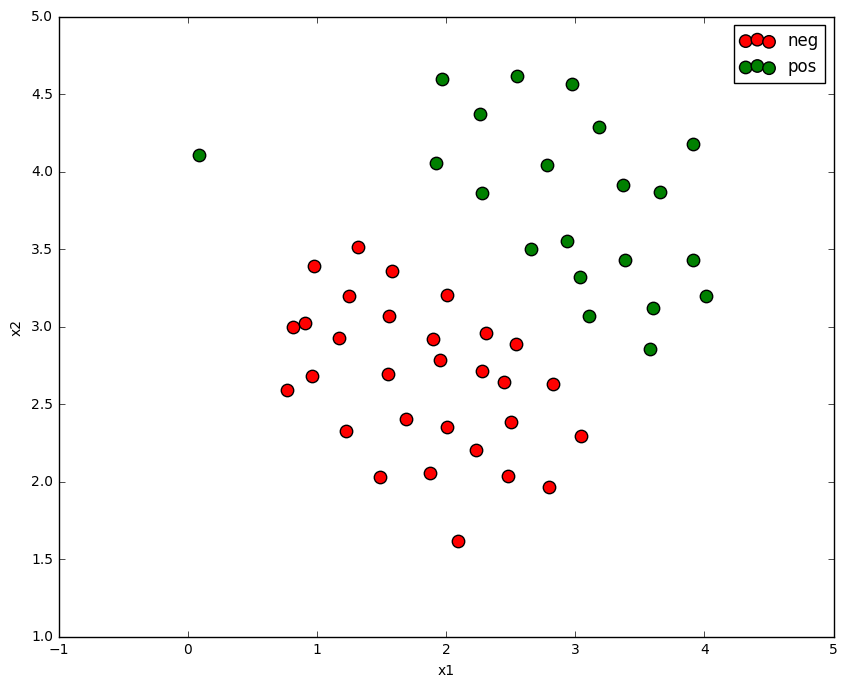

In [2]:
import linear_svm
import utils
from sklearn import preprocessing, metrics
from linear_classifier import LinearSVM_twoclass

############################################################################
#  Part  0: Loading and Visualizing Data                                   #
#  We start the exercise by first loading and visualizing the dataset.     #
#  The following code will load the dataset into your environment and plot #
#  the data.                                                               #
############################################################################

# load ex4data1.mat

X,y = utils.load_mat('data/ex4data1.mat')

utils.plot_twoclass_data(X,y,'x1', 'x2',['neg','pos'])
plt.show()



### The hinge loss function and gradient
Now you will implement the hinge loss cost function and its gradient for support vector machines.
Complete the **binary\_svm\_loss** function in **linear\_svm.py**  to return the cost and gradient for the hinge loss function.
 Recall that the hinge loss function is
$$ J(\theta) = \frac{1}{2m} \sum_{j=0}^{d} {\theta_j}^2 + \frac{C}{m} \sum_{i=1}^{m} max(0, 1 -y^{(i)}h_\theta(x^{(i)})) $$

where $h_{\theta}(x) = \theta^ T x$ with $x_0 = 1$.  $C$ is the penalty factor which measures how much misclassifications are penalized. If $y^{(i)}h_\theta(x^{(i)})) > 1$, then $x^{(i)}$ is correctly classified and the loss associated with that example is zero. If $y^{(i)}h_\theta(x^{(i)})) < 1$, then $x^{(i)}$ is not within the appropriate margin (positive or negative) and the loss associated with that example is greater than zero. The gradient of the hinge loss
function  is a vector of the same length as $\theta$ where the $j^{th}$ element, $j=0,1,\ldots,d$ is defined as follows:

\begin{eqnarray*} \frac{\partial J(\theta)}{\partial \theta_j}  & = &
\left \{
\begin{array}{l l}
\frac{1}{m} \theta_j + \frac{C}{m} \sum_{i=1}^{m} -y^{(i)}x_j^{(i)}& \mbox{ if } y^{(i)}h_\theta(x^{(i)})) < 1\\
\frac{1}{m} \theta_j & \mbox{ if } y^{(i)}h_\theta(x^{(i)})) >= 1\\
\end{array} \right. 
\end{eqnarray*}

Once you are done, the cell below will call your **binary\_svm\_loss** function with a zero vector $\theta$.
 You should see that the cost $J$ is 1.0. The gradient of the loss function with respect to an all-zeros $\theta$ vector is also computed and should be $[-0.12956186 -0.00167647]^T$.

In [3]:
############################################################################
#  Part 1: Hinge loss function and gradient                                #
############################################################################

C = 1
theta = np.zeros((X.shape[1],))

yy = np.ones(y.shape)
yy[y==0] = -1
J,grad = linear_svm.binary_svm_loss(theta,X,yy,C)

print "J = ", J, " grad = ", grad


J =  1.0  grad =  [-0.12956186 -0.00167647]


### Impact of varying C
In this part of the exercise, you will try using different values of the C
parameter with SVMs. Informally, the C parameter is a positive value that
controls the penalty for misclassified training examples. A large C parameter
tells the SVM to try to classify all the examples correctly. C plays a role
similar to $\frac{1}{\lambda}$, where $\lambda$ is the regularization parameter that we were using
previously for logistic regression.

The SVM training function is in **linear\_classifier.py** -- this is a gradient descent algorithm that uses your loss and gradient functions. 
The cell below will train an SVM on the example data set 1 with C = 1. It first scales the data to have zero mean and unit variance, and adds the intercept term to the data matrix.
When C = 1, you should find that the SVM puts the decision boundary in
the gap between the two datasets and misclassifies the data point on the far
left. 

Your task is to try different values of C on this dataset. Specifically, you
should change the value of C in the cell below to C = 100 and run the SVM
training again. When C = 100, you should find that the SVM now classifies
every single example correctly, but has a decision boundary that does not
appear to be a natural fit for the data. Include a plot of the decision boundary for C = 100 in writeup.pdf.

iteration 0 / 50000: loss 100.000000
iteration 1000 / 50000: loss 9.988833
iteration 2000 / 50000: loss 7.304432
iteration 3000 / 50000: loss 6.666842
iteration 4000 / 50000: loss 6.290425
iteration 5000 / 50000: loss 5.915573
iteration 6000 / 50000: loss 5.618670
iteration 7000 / 50000: loss 5.351989
iteration 8000 / 50000: loss 5.086081
iteration 9000 / 50000: loss 4.867509
iteration 10000 / 50000: loss 4.749586
iteration 11000 / 50000: loss 4.650429
iteration 12000 / 50000: loss 4.551588
iteration 13000 / 50000: loss 4.453222
iteration 14000 / 50000: loss 4.355225
iteration 15000 / 50000: loss 4.257697
iteration 16000 / 50000: loss 4.164655
iteration 17000 / 50000: loss 4.104738
iteration 18000 / 50000: loss 4.045056
iteration 19000 / 50000: loss 3.985608
iteration 20000 / 50000: loss 3.926277
iteration 21000 / 50000: loss 3.867261
iteration 22000 / 50000: loss 3.808508
iteration 23000 / 50000: loss 3.750223
iteration 24000 / 50000: loss 3.694413
iteration 25000 / 50000: loss 3.6389

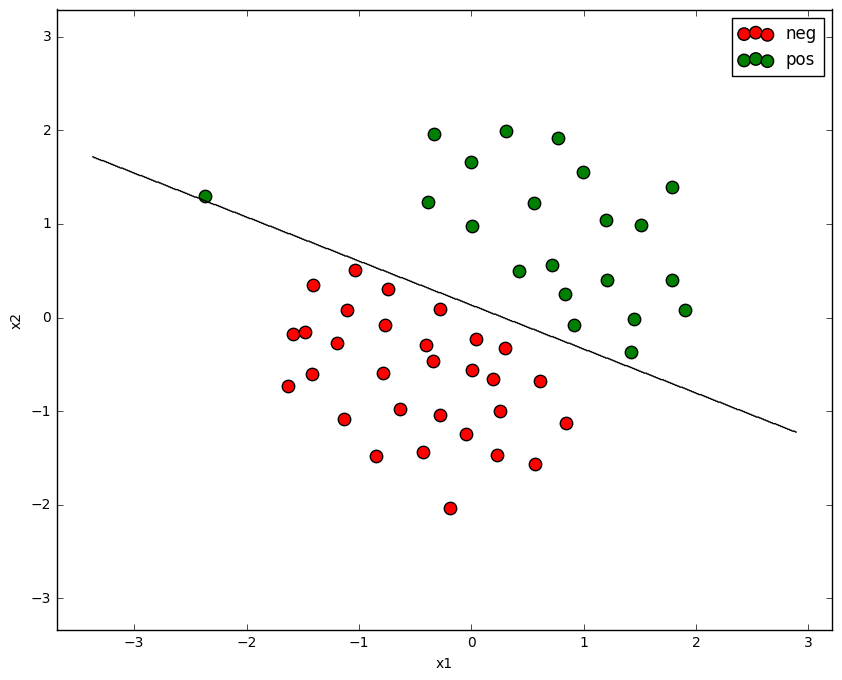

In [4]:
############################################################################
# Scale the data and set up the SVM training                               #
############################################################################

# scale the data

scaler = preprocessing.StandardScaler().fit(X)
scaleX = scaler.transform(X)

# add an intercept term and convert y values from [0,1] to [-1,1]

XX = np.array([(1,x1,x2) for (x1,x2) in scaleX])
yy = np.ones(y.shape)
yy[y == 0] = -1
yy[y == 0] = -1

############################################################################
#  Part  2: Training linear SVM                                            #
#  We train a linear SVM on the data set and the plot the learned          #
#  decision boundary                                                       #
############################################################################

############################################################################
# You will change this line below to vary C.                               #
############################################################################

C = 100

svm = LinearSVM_twoclass()
svm.theta = np.zeros((XX.shape[1],))
svm.train(XX,yy,learning_rate=1e-4,reg=C,num_iters=50000,verbose=True)

# classify the training data

y_pred = svm.predict(XX)

print "Accuracy on training data = ", metrics.accuracy_score(yy,y_pred)

# visualize the decision boundary

utils.plot_decision_boundary(scaleX,y,svm,'x1','x2',['neg','pos'])

### SVMs with Gaussian kernels 
In this part of the exercise, you will be using SVMs to do non-linear classification.
In particular, you will be using SVMs with Gaussian kernels on
datasets that are not linearly separable.

To find non-linear decision boundaries with the SVM, we need to first implement
a Gaussian kernel. You can think of the Gaussian kernel as a similarity
function that measures the distance between a pair of examples,
$(x^{(i)}, x^{(j)})$. The Gaussian kernel is also parameterized by a bandwidth parameter,
$\sigma$,  which determines how fast the similarity metric decreases (to 0)
as the examples are further apart.
You should now complete the function **gaussian\_kernel** in **utils.py** to compute
the Gaussian kernel between two examples. The Gaussian kernel
function is defined as:

$$ k(x^{(i)},x^{(j)}) = exp\left(- \frac{{||x^{(i)}-x^{(j)}||}^2}{2\sigma^2}\right) $$

When you have completed the function, the cell below
will test your kernel function on two provided examples and you should expect
to see a value of 0.324652.

In [5]:
############################################################################
#  Part  3: Training SVM with a kernel                                     #
#  We train an SVM with an RBF kernel on the data set and the plot the     #
#  learned decision boundary                                               #
############################################################################

# test your Gaussian kernel implementation

x1 = np.array([1,2,1])
x2 = np.array([0,4,-1])
sigma = 2

print "Guassian kernel value (should be around 0.324652) = ", utils.gaussian_kernel(x1,x2,sigma)

Guassian kernel value (should be around 0.324652) =  0.324652467358


### SVMs with Gaussian kernels on Dataset 2
The next cell will load and plot dataset 2. From
the plot, you can observe that there is no linear decision boundary that
separates the positive and negative examples for this dataset. However, by
using the Gaussian kernel with the SVM, you will be able to learn a non-linear
decision boundary that can perform reasonably well for the dataset.
If you have correctly implemented the Gaussian kernel function, the cell below
will proceed to train the SVM with the Gaussian kernel on this dataset.

The decision boundary found by the SVM with C = 1 and a Gaussian
kernel with $\sigma = 0.01$ will be plotted. The decision boundary is able to separate most of the positive and
negative examples correctly and follows the contours of the dataset well.


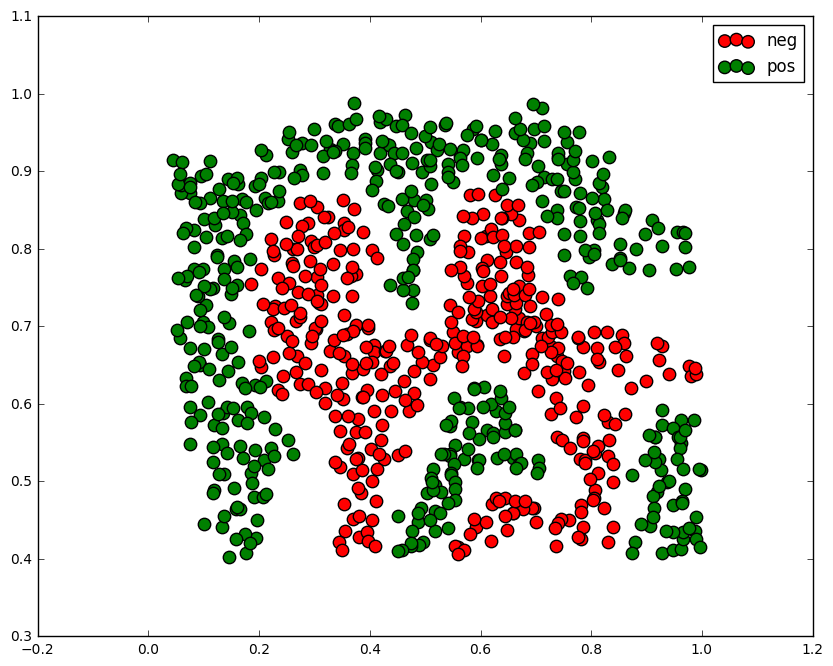

In [6]:
# load ex4data2.mat

X,y = utils.load_mat('data/ex4data2.mat')

# visualize the data

utils.plot_twoclass_data(X,y,'', '',['neg','pos'])

# convert X to kernel form with the kernel function

sigma = 0.02

# compute the kernel (slow!)

K = np.array([utils.gaussian_kernel(x1,x2,sigma) for x1 in X for x2 in X]).reshape(X.shape[0],X.shape[0])

# scale the kernelized data matrix

scaler = preprocessing.StandardScaler().fit(K)
scaleK = scaler.transform(K)

# add the intercept term

KK = np.vstack([np.ones((scaleK.shape[0],)),scaleK.T]).T

# transform y from [0,1] to [-1,1]

yy = np.ones(y.shape)
yy[y == 0] = -1


iteration 0 / 20000: loss 1.000000
iteration 1000 / 20000: loss 0.209960
iteration 2000 / 20000: loss 0.061174
iteration 3000 / 20000: loss 0.031185
iteration 4000 / 20000: loss 0.019854
iteration 5000 / 20000: loss 0.013949
iteration 6000 / 20000: loss 0.010347
iteration 7000 / 20000: loss 0.008626
iteration 8000 / 20000: loss 0.007720
iteration 9000 / 20000: loss 0.006997
iteration 10000 / 20000: loss 0.006296
iteration 11000 / 20000: loss 0.005609
iteration 12000 / 20000: loss 0.004991
iteration 13000 / 20000: loss 0.004498
iteration 14000 / 20000: loss 0.004051
iteration 15000 / 20000: loss 0.003755
iteration 16000 / 20000: loss 0.003554
iteration 17000 / 20000: loss 0.003427
iteration 18000 / 20000: loss 0.003299
iteration 19000 / 20000: loss 0.003171


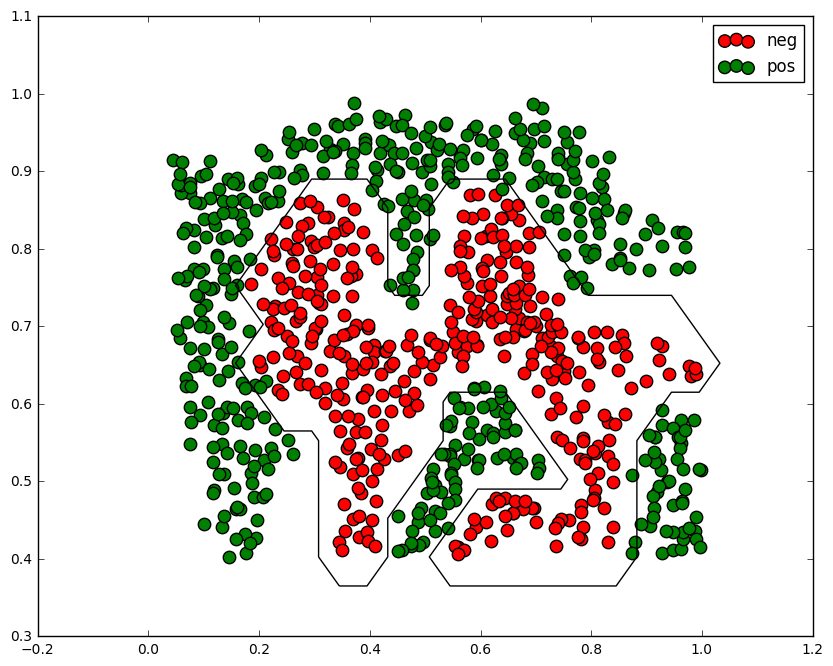

In [8]:


# set up the SVM and learn the parameters

svm = LinearSVM_twoclass()
svm.theta = np.zeros((KK.shape[1],))
C = 1
svm.train(KK,yy,learning_rate=1e-4,reg=C,num_iters=20000,verbose=True, step=1000)

# visualize the boundary

utils.plot_decision_kernel_boundary(X,y,scaler,sigma,svm,'','',['neg','pos'])

### Selecting hyperparameters for SVMs with Gaussian kernels
In this part of the exercise, you will gain more practical skills on how to use
a SVM with a Gaussian kernel. The next cell will load and display
a third dataset. 
In the provided dataset, **ex4data3.mat**, you are given the variables **X**,
**y**, **Xval**, **yval**.  You will be using the SVM with the Gaussian
kernel with this dataset. Your task is to use the  validation set **Xval**, **yval** to determine the
best C and $\sigma$ parameter to use. You should write any additional code necessary
to help you search over the parameters C and $\sigma$. For both C and $\sigma$, we
suggest trying values in multiplicative steps (e.g., 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30).
Note that you should try all possible pairs of values for C and $\sigma$ (e.g., C = 0.3
and $\sigma$ = 0.1). For example, if you try each of the 8 values listed above for C
and for $\sigma$, you would end up training and evaluating (on the  validation
set) a total of $8^2 = 64$ different models.

When  selecting  the
best C and $\sigma$ parameter to use, you train on {\tt X,y} with a given C and $\sigma$, and then  evaluate the error of the model on the 
validation set. Recall that for classification, the error is defined as the
fraction of the  validation examples that were classified incorrectly.
You can use the **predict** method of the SVM classifier to generate the predictions for the
 validation set.
 
 After you have determined the best C and $\sigma$ parameters to use, you
should replace the assignments to **best\_C** and **best\_sigma** in the cell below. 

iteration 0 / 20000: loss 0.010000
iteration 5000 / 20000: loss 0.009947
iteration 10000 / 20000: loss 0.009894
iteration 15000 / 20000: loss 0.009841
When C = 0.01 and sigma = 0.01, validation accuracy = 0.735
iteration 0 / 20000: loss 0.010000
iteration 5000 / 20000: loss 0.009888
iteration 10000 / 20000: loss 0.009776
iteration 15000 / 20000: loss 0.009664
When C = 0.01 and sigma = 0.03, validation accuracy = 0.925
iteration 0 / 20000: loss 0.010000
iteration 5000 / 20000: loss 0.009196
iteration 10000 / 20000: loss 0.008395
iteration 15000 / 20000: loss 0.007599
When C = 0.01 and sigma = 0.1, validation accuracy = 0.925
iteration 0 / 20000: loss 0.010000
iteration 5000 / 20000: loss 0.007645
iteration 10000 / 20000: loss 0.005303
iteration 15000 / 20000: loss 0.004303
When C = 0.01 and sigma = 0.3, validation accuracy = 0.815
iteration 0 / 20000: loss 0.010000
iteration 5000 / 20000: loss 0.007657
iteration 10000 / 20000: loss 0.005549
iteration 15000 / 20000: loss 0.004854
When C 

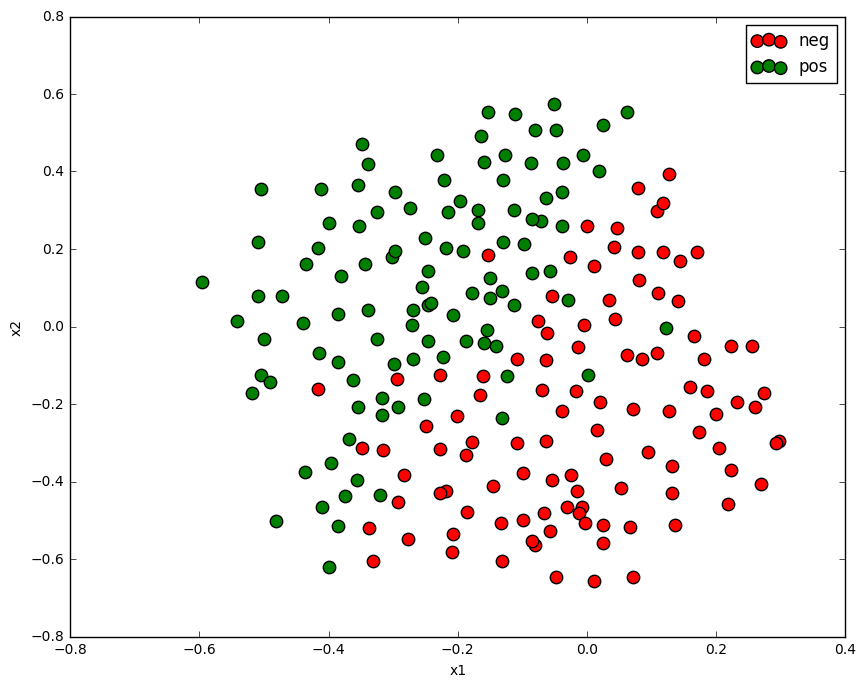

In [26]:
############################################################################
#  Part  4: Training SVM with a kernel                                     #
#  We train an SVM with an RBF kernel on the data set and the plot the     #
#  learned decision boundary                                               #
############################################################################

# load ex4data3.mat

X,y,Xval,yval = utils.loadval_mat('data/ex4data3.mat')

# transform y and yval from [0,1] to [-1,1]

yy = np.ones(y.shape)
yy[y == 0] = -1

yyval = np.ones(yval.shape)
yyval[yval == 0] = -1

# visualize the data

utils.plot_twoclass_data(X,y,'x1', 'x2',['neg','pos'])


############################################################################
# TODO                                                                     #
# select hyperparameters C and sigma for this dataset using                #
# Xval and yval                                                            #
############################################################################
Cvals = [0.01,0.03,0.1,0.3,1,3,10,30]
sigma_vals = [0.01,0.03,0.1,0.3,1,3,10,30]

# select hyperparameters here; loopover all Cvals and sigma_vals. 
# About 8-10 lines of code here

# TODO: make sure you put in the best_C and best_sigma from the analysis above!
# Dummy values here

best_accuracy=0
best_C=Cvals[0]
best_sigma=sigma_vals[0]

for C in Cvals:
    for sigma_val in sigma_vals:
        K = np.array([utils.gaussian_kernel(x1,x2,sigma_val) for x1 in X for x2 in X]).reshape(X.shape[0],X.shape[0])
        scaler = preprocessing.StandardScaler().fit(K)
        scaleK = scaler.transform(K)
        KK = np.vstack([np.ones((scaleK.shape[0],)),scaleK.T]).T
        
        Kval = np.array([utils.gaussian_kernel(x1,x2,sigma_val) for x1 in Xval for x2 in X]).reshape(Xval.shape[0],X.shape[0])
        scaler = preprocessing.StandardScaler().fit(Kval)
        scaleK = scaler.transform(Kval)
        KKval = np.vstack([np.ones((scaleK.shape[0],)),scaleK.T]).T

        svm = LinearSVM_twoclass()
        svm.theta = np.zeros((KK.shape[1],))
        svm.train(KK,yy,learning_rate=1e-4,reg=C,num_iters=20000,verbose=True, step=5000)
        
        yyval_pred = svm.predict(KKval)
        accuracy=np.mean(yyval==yyval_pred)
        
        if best_accuracy<=accuracy:
            best_accuracy=accuracy
            best_C=C
            best_sigma=sigma_val
            
        print "When C = {} and sigma = {}, validation accuracy = {}".format(C,sigma_val,accuracy)
        print '='*70
        

# classify the training data


In [27]:
print "best C = {}, best sigma = {}, best accuracy = {}".format(best_C,best_sigma,best_accuracy)

best C = 0.1, best sigma = 0.1, best accuracy = 0.96


iteration 0 / 10000: loss 0.100000
iteration 5000 / 10000: loss 0.036505


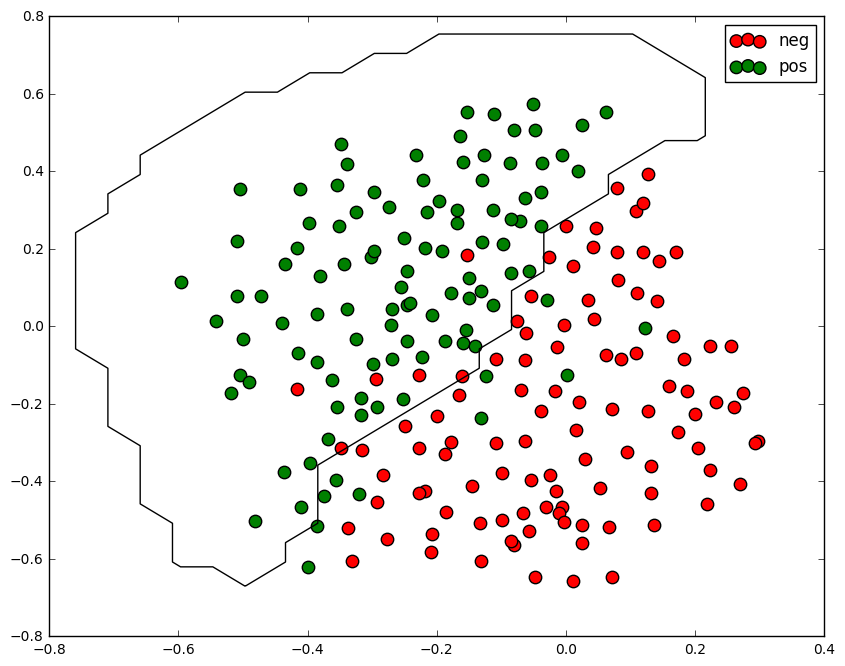

In [28]:
# train an SVM on (X,y) with best_C and best_sigma

K = np.array([utils.gaussian_kernel(x1,x2,best_sigma) for x1 in X for x2 in X]).reshape(X.shape[0],X.shape[0])
scaler = preprocessing.StandardScaler().fit(K)
scaleK = scaler.transform(K)
KK = np.vstack([np.ones((scaleK.shape[0],)),scaleK.T]).T

best_svm = LinearSVM_twoclass()

best_svm.theta = np.zeros((KK.shape[1],))
best_svm.train(KK,yy,learning_rate=1e-4,reg=best_C,num_iters=10000,verbose=True, step=5000)


# TODO: construct the Gram matrix of the data with best_sigma, scale it, add the column of ones
#  Then use svm_train to train best_svm with the best_C paremeter. Use 20,000 iterations and
# a learning rate of 1e-4. 
# about 5-6 lines of code expected here.

############################################################################
#       END OF YOUR CODE                                                   #
############################################################################


# visualize the boundary (uncomment this line after you learn the best svm)

utils.plot_decision_kernel_boundary(X,y,scaler,best_sigma,best_svm,'','',['neg','pos'])